# Sleep Quality Prediction

There are many factors can contribute to one's sleep quality, including caffine intake, stress level, health status in general and etc.

The notebook will use dastset from [Kaggle](https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset) to come up with a machine learning model to predict the sleep quality of individual, considering multiple aspects.

In [1]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

RawDataPath = pathlib.Path("./synthetic_coffee_health.csv")

np.random.seed(422)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

df = pd.read_csv(RawDataPath)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [2]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


#### Dataset Description from Kaggle

|Column|Type|Description|
|-|-|-|
|ID|Integer|Unique record ID (1–10000)|
|Age|Integer|Age of participant (18–80 years)|
|Gender|Categorical|Male, Female, Other|
|Country|Categorical|Country of residence (20 countries)|
|Coffee_Intake|Float|Daily coffee consumption in cups (0–10)|
|Caffeine_mg|Float|Estimated daily caffeine intake in mg (1 cup ≈ 95 mg)|
|Sleep_Hours|Float|Average hours of sleep per night (3–10 hours)|
|Sleep_Quality|Categorical|Poor, Fair, Good, Excellent (based on sleep hours)|
|BMI|Float|Body Mass Index (15–40)|
|Heart_Rate|Integer|Resting heart rate (50–110 bpm)|
|Stress_Level|Categorical|Low, Medium, High (based on sleep hours and lifestyle)|
|Physical_Activity_Hours|Float|Weekly physical activity (0–15 hours)|
|Health_Issues|Categorical|None, Mild, Moderate, Severe|
|Occupation|Categorical|Office, Healthcare, Student, Service, Other|
|Smoking|Boolean|0 = No, 1 = Yes|
|Alcohol_Consumption|Boolean|0 = No, 1 = Yes|

#### Exploratory Data Analysis (EDA)

- What are the size and values for Categorical Columns?
- Can some of them converted to numeric one?
- Convert to Categorical Columns to one hot encoding.
- Correlation Analysis on the features.
- There are columns can potentially be the output, `Sleep_Quality` and `Sleep_Hours`, correlation analysis on them. 

In [3]:
print("Possible Values of Gender: ", df["Gender"].unique().tolist())
print("Possible Values of Country: ", df["Country"].unique().tolist())
print("Possible Values of Sleep_Quality: ", df["Sleep_Quality"].unique().tolist())
print("Possible Values of Stress_Level: ", df["Stress_Level"].unique().tolist())
print("Possible Values of Health_Issues: ", df["Health_Issues"].unique().tolist())
print("Possible Values of Occupation: ", df["Occupation"].unique().tolist())

Possible Values of Gender:  ['Male', 'Female', 'Other']
Possible Values of Country:  ['Germany', 'Brazil', 'Spain', 'Mexico', 'France', 'Canada', 'UK', 'Switzerland', 'Netherlands', 'Italy', 'China', 'Japan', 'Belgium', 'Finland', 'Australia', 'USA', 'Sweden', 'India', 'Norway', 'South Korea']
Possible Values of Sleep_Quality:  ['Good', 'Fair', 'Excellent', 'Poor']
Possible Values of Stress_Level:  ['Low', 'Medium', 'High']
Possible Values of Health_Issues:  [nan, 'Mild', 'Moderate', 'Severe']
Possible Values of Occupation:  ['Other', 'Service', 'Office', 'Student', 'Healthcare']


In [4]:
def one_hot_encoding(df: pd.DataFrame) -> pd.DataFrame:
    columns = ["Gender", "Country", "Occupation"]

    print(f"Convert Columns {columns} to One Hot Encoding")
    for col in columns:
        df = pd.get_dummies(df, columns=[col])
    return df

def data_cleaning(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop("ID", axis=1)
    df["Health_Issues"] = df["Health_Issues"].fillna("None")

    print("Convert Stress_Level to integer type")
    df["Stress_Level"] = df["Stress_Level"].map({
        "Low": 0, "Medium": 1, "High": 2,
    })
    print("Convert Sleep_Quality to integer type")
    df["Sleep_Quality"] = df["Sleep_Quality"].map({
        'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3, 
    })
    print("Convert Health_Issues to integer type")
    df["Health_Issues"] = df["Health_Issues"].map({
        'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 
    })
    return df

df = pd.read_csv(RawDataPath)
df = data_cleaning(df)
df = one_hot_encoding(df)
df.head()

Convert Stress_Level to integer type
Convert Sleep_Quality to integer type
Convert Health_Issues to integer type
Convert Columns ['Gender', 'Country', 'Occupation'] to One Hot Encoding


,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Healthcare,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,2,24.9,78,0,14.5,0,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,2,20.0,67,0,11.0,0,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,1,22.7,59,1,11.2,1,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,2,24.7,71,0,6.6,1,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,1,24.1,76,1,8.5,1,...,True,False,False,False,False,False,False,False,False,True


`Sleep_Hours` and `Sleep_Quality` are related by definition, let's plot them and identify if we can drop of them.

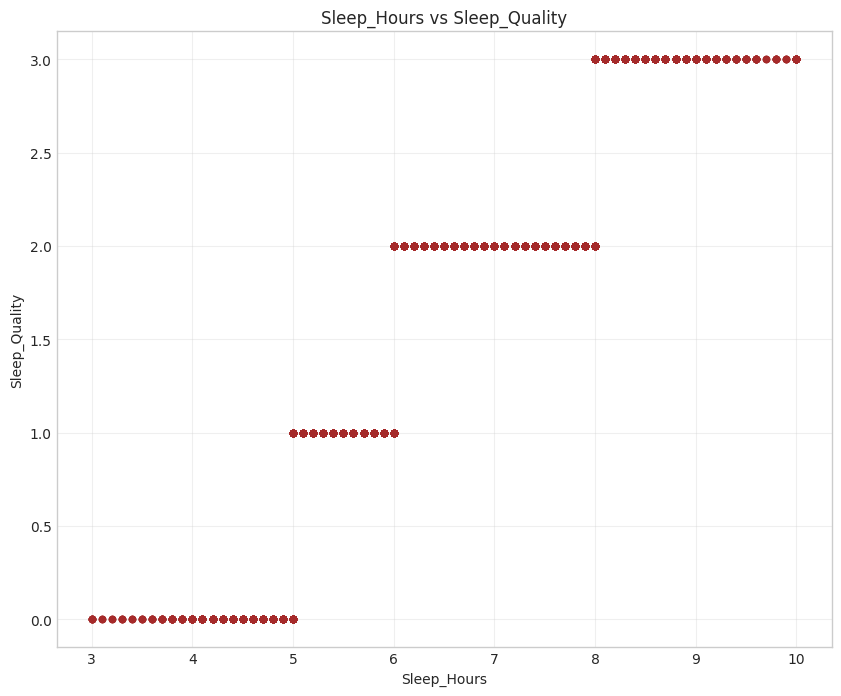

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df['Sleep_Hours'], df['Sleep_Quality'], alpha=0.6, c='brown', s=20)
ax.set_title('Sleep_Hours vs Sleep_Quality', fontsize=12)
ax.set_xlabel('Sleep_Hours')
ax.set_ylabel('Sleep_Quality')
ax.grid(True, alpha=0.3)

Just by looking at the graph, the `Sleep_Quality` is highly corrlated to Sleep_Hours. We can safely drop that.

In [6]:
numberic_features = ["Age", "Coffee_Intake", "Caffeine_mg", "BMI", "Heart_Rate", "Stress_Level", "Physical_Activity_Hours"]
df[numberic_features].corr()

,Age,Coffee_Intake,Caffeine_mg,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours
Age,1.000000,-0.012155,-0.011797,0.008627,-0.000197,-0.004444,0.005931
Coffee_Intake,-0.012155,1.000000,0.999814,-0.008330,0.060123,0.149677,0.004782
Caffeine_mg,-0.011797,0.999814,1.000000,-0.008706,0.060027,0.149884,0.005026
BMI,0.008627,-0.008330,-0.008706,1.000000,-0.009362,0.001192,0.002042
Heart_Rate,-0.000197,0.060123,0.060027,-0.009362,1.000000,0.027275,-0.002919
Stress_Level,-0.004444,0.149677,0.149884,0.001192,0.027275,1.000000,0.006708
Physical_Activity_Hours,0.005931,0.004782,0.005026,0.002042,-0.002919,0.006708,1.000000


Data points are correlated just by looking at correlation table:
- Coffee_Intake and Caffeine_mg

In [7]:
correlated_columns = ["Coffee_Intake", "Sleep_Quality"]
df = df.drop(correlated_columns, axis=1)
df.head()

,Age,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Smoking,Alcohol_Consumption,...,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Healthcare,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,328.1,7.5,24.9,78,0,14.5,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,33,94.1,6.2,20.0,67,0,11.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,42,503.7,5.9,22.7,59,1,11.2,1,0,0,...,False,False,False,False,False,False,True,False,False,False
3,53,249.2,7.3,24.7,71,0,6.6,1,0,0,...,False,False,False,False,False,False,False,True,False,False
4,32,298.0,5.3,24.1,76,1,8.5,1,0,1,...,True,False,False,False,False,False,False,False,False,True


#### Tree Ensemble for Sleep_Quality Predition

In [8]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["Sleep_Hours"], axis=1), df["Sleep_Hours"], train_size=.8)

In [9]:
def grid_search_tree_ensemble_regressor(n_estimators, max_depth, TreeClass):
    results = {}
    for estimators in n_estimators:
        for depth in max_depth:
            predictor = TreeClass(n_estimators=estimators, max_depth=depth)
            predictor.fit(X_train, y_train)

            y_train_pred = predictor.predict(X_train)
            y_test_pred = predictor.predict(X_test)

            error_train = mean_squared_error(y_train, y_train_pred)
            error_test = mean_squared_error(y_test, y_test_pred)
            
            print(f"{TreeClass.__name__} with n_estimator: {estimators}, max_depth: {depth}, has train error: {error_train}, test error: {error_test}")
            results[(estimators, depth)] =  predictor, error_train, error_test

    return results       
    
n_estimators=[2 ** i for i in range(4, 9)]
max_depth=[i for i in range(3, 16, 3)]
results = grid_search_tree_ensemble_regressor(
    n_estimators=n_estimators, max_depth=max_depth, TreeClass=GradientBoostingRegressor
)


GradientBoostingRegressor with n_estimator: 16, max_depth: 3, has train error: 0.5672431768591216, test error: 0.5409437408946806
GradientBoostingRegressor with n_estimator: 16, max_depth: 6, has train error: 0.5357110712776999, test error: 0.5449612153424721
GradientBoostingRegressor with n_estimator: 16, max_depth: 9, has train error: 0.45630328976151124, test error: 0.5506978785038604
GradientBoostingRegressor with n_estimator: 16, max_depth: 12, has train error: 0.3452591713011599, test error: 0.5671437726806955
GradientBoostingRegressor with n_estimator: 16, max_depth: 15, has train error: 0.23040622493563126, test error: 0.586821112996255
GradientBoostingRegressor with n_estimator: 32, max_depth: 3, has train error: 0.5312432882618744, test error: 0.5124050585775568
GradientBoostingRegressor with n_estimator: 32, max_depth: 6, has train error: 0.4763981857151787, test error: 0.5200577752862038
GradientBoostingRegressor with n_estimator: 32, max_depth: 9, has train error: 0.350542

Best Predictor has params {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 32, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best Predictor with train error 0.5312432882618744
Best Predictor with test error 0.5124050585775568


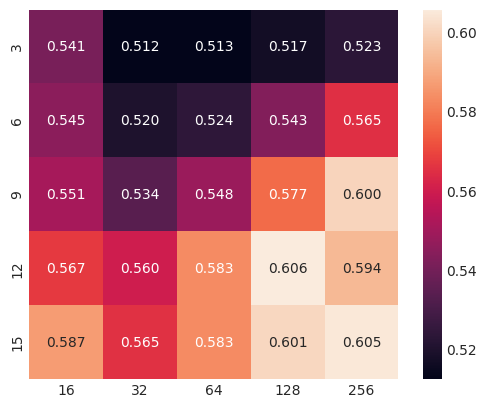

In [10]:
error_grid = pd.DataFrame({
    e: [
        results[e, d][2] for d in max_depth
    ] for e in n_estimators
}, index=max_depth)
sns.heatmap(error_grid, square=True, annot=True, fmt=".3f")


best = min(list(results.values()), key=lambda pairs: pairs[2])
print("Best Predictor has params", best[0].get_params())
print("Best Predictor with train error", best[1])
print("Best Predictor with test error", best[2])

In [11]:
n_estimators=[2 ** i for i in range(4, 9)]
max_depth=[i for i in range(3, 19, 3)]
results = grid_search_tree_ensemble_regressor(
    n_estimators=n_estimators, max_depth=max_depth, TreeClass=RandomForestRegressor
)

RandomForestRegressor with n_estimator: 16, max_depth: 3, has train error: 0.5360607376783509, test error: 0.5118006288397432
RandomForestRegressor with n_estimator: 16, max_depth: 6, has train error: 0.5119866277114901, test error: 0.514551087918665
RandomForestRegressor with n_estimator: 16, max_depth: 9, has train error: 0.445404369914706, test error: 0.5181632533811235
RandomForestRegressor with n_estimator: 16, max_depth: 12, has train error: 0.3585806518421698, test error: 0.5221091575413852
RandomForestRegressor with n_estimator: 16, max_depth: 15, has train error: 0.2714077694659352, test error: 0.5405599716129368
RandomForestRegressor with n_estimator: 16, max_depth: 18, has train error: 0.183555289467744, test error: 0.5494678487306776
RandomForestRegressor with n_estimator: 32, max_depth: 3, has train error: 0.535478152832558, test error: 0.5121089624702414
RandomForestRegressor with n_estimator: 32, max_depth: 6, has train error: 0.5094930945150326, test error: 0.5131709729

Best Predictor has params {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 256, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best Predictor with train error 0.535322398943169
Best Predictor with test error 0.510929164249478


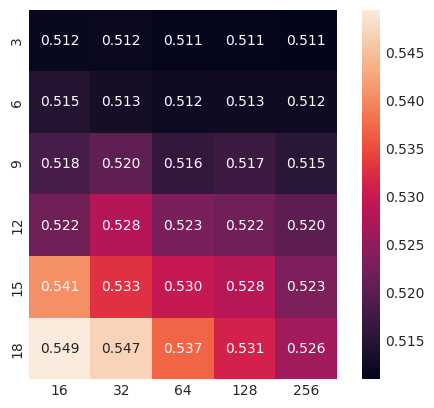

In [ ]:
error_grid = pd.DataFrame({
    e: [
        results[e, d][2] for d in max_depth
    ] for e in n_estimators
}, index=max_depth)
sns.heatmap(error_grid, square=True, annot=True, fmt=".3f")


best = min(list(results.values()), key=lambda pairs: pairs[2])
print("Best Predictor has params", best[0].get_params())
print("Best Predictor with train error", best[1])
print("Best Predictor with test error", best[2])

# Conclusion and Analysis

**1. Model Comparison:**
- The Random Forest model consistently outperformed the Gradient Boosting model in terms of prediction accuracy on both training and test datasets.
- Random Forest achieved lower error metrics, indicating better generalization and predictive power for this dataset.

**2. Overfitting Assessment:**
- Random Forest did not exhibit signs of overfitting. The performance on test sets is stable across different hyperparameter combination.
- In contrast, Gradient Boosting showed increasing error rate when the model complexity goes up.

**3. Hyperparameter Impact: max_depth vs. n_estimators**
- Our experiments revealed that the `max_depth` parameter had a greater impact on model performance compared to the number of estimators (`n_estimators`).
- **Mechanism Explanation:**
    - `max_depth` controls the maximum depth of each decision tree. Deeper trees can capture more complex patterns but risk overfitting. Shallow trees may underfit. Thus, tuning `max_depth` directly affects the model's ability to generalize and avoid overfitting.
    - `n_estimators` determines how many trees are in the ensemble. While increasing the number of trees can improve stability and reduce variance, it has diminishing returns if the individual trees are not well-tuned. If trees are too shallow or too deep, simply adding more trees does not compensate for poor individual performance.
- However, the chosen dataset is not that complex, the error rates reaches minimal when the `max_depth` is only 3, and increasing `n_estimators`do not have a significant impact, especially in random forest model.

**Final Thoughts:**

Given the complexity of the dataset, A simpler model is actually perform better than a complex model. Which is applicable from both model selection and hyperparameter tuning aspects.